#### Import the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Read the Dataset

In [6]:
df = pd.read_csv('datasets/headlines.csv', header=None)

In [7]:
df

,0
0,Budget to set scene for election\n \n Gordon B...
1,Army chiefs in regiments decision\n \n Militar...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...
...,...
2220,India opens skies to competition\n \n India wi...
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...
2222,Survey confirms property slowdown\n \n Governm...
2223,High fuel prices hit BA's profits\n \n British...


In [10]:
print(df[0][0])

Budget to set scene for election
 
 Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.
 
 Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.
 
 - Increase in the stamp duty threshold from Â£60,000 
  - A freeze on petrol duty 
  - An extension of tax credit scheme for poorer families 
  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chanc

#### Data Preprocessing

In [12]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

In [14]:
swords = stopwords.words('english')
wnl = WordNetLemmatizer()

In [17]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [token for token in tokens1 if token.isalpha()]
    tokens3 = [token.lower() for token in tokens2 
               if token.lower() not in swords]
    return tokens3

In [18]:
sent = 'It was expected raining today. But not completed.'

In [19]:
clean_text(sent)

['expected', 'raining', 'today', 'completed']

In [21]:
tag = pos_tag(["expected"])
tag

[('expected', 'VBN')]

In [22]:
def lemmatize(word):
    tag = pos_tag([word])
    pos = 'n'
    wnl = WordNetLemmatizer()
    if tag[0][1].startswith('N'):
        pos = 'n'
    if tag[0][1].startswith('V'):
        pos = 'v'
    if tag[0][1].startswith('J'):
        pos = 'a'
    if tag[0][1].startswith('R'):
        pos = 'r'
    return (wnl.lemmatize(word, pos=pos))

In [23]:
lemmatize('raining')

'rain'

In [24]:
lemmatize('better')

'well'

In [25]:
lemmatize('players')

'player'

In [43]:
swords.extend(['said','made','make','new','one','say'])

In [44]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [token for token in tokens1 if token.isalpha()]
    tokens3 = [token.lower() for token in tokens2 
               if token.lower() not in swords]
    tokens4 = [lemmatize(token) for token in tokens3]
    return tokens4

In [45]:
clean_text(sent)

['expect', 'rain', 'today', 'complete']

In [46]:
cleaned_text = df[0].apply(clean_text)

In [47]:
cleaned_text

0       [budget, set, scene, election, gordon, brown, ...
1       [army, chief, regiment, decision, military, ch...
2       [howard, denies, split, id, card, michael, how...
3       [observer, monitor, uk, election, minister, in...
4       [kilroy, name, election, seat, target, show, h...
                              ...                        
2220    [india, open, sky, competition, india, allow, ...
2221    [yukos, bankruptcy, u, matter, russian, author...
2222    [survey, confirms, property, slowdown, governm...
2223    [high, fuel, price, hit, ba, profit, british, ...
2224    [u, trade, gap, hit, record, gap, u, export, i...
Name: 0, Length: 2225, dtype: object

In [48]:
final_text = ' '.join(cleaned_text.sum())

In [49]:
final_text;

In [50]:
from wordcloud import WordCloud

In [51]:
wcloud = WordCloud(background_color='white').generate(final_text)

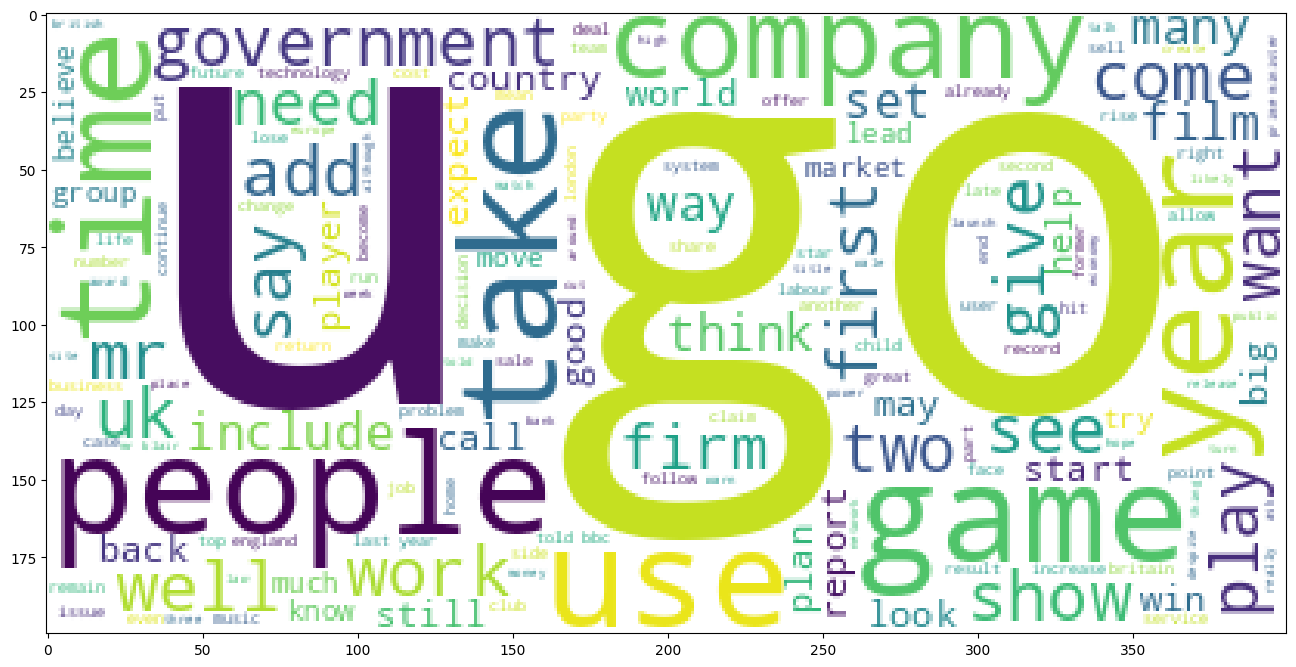

In [52]:
plt.figure(figsize=(16,9))
plt.imshow(wcloud)

#### Vectorization

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [56]:
x_new = tfidf.fit_transform(df[0])

In [57]:
x_new.shape

(2225, 21406)

#### Identify the clusters

In [59]:
pip install kneed

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### Create the clusters

In [64]:
from sklearn.cluster import KMeans

In [65]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    km.fit_predict(x_new)
    sse.append(km.inertia_)

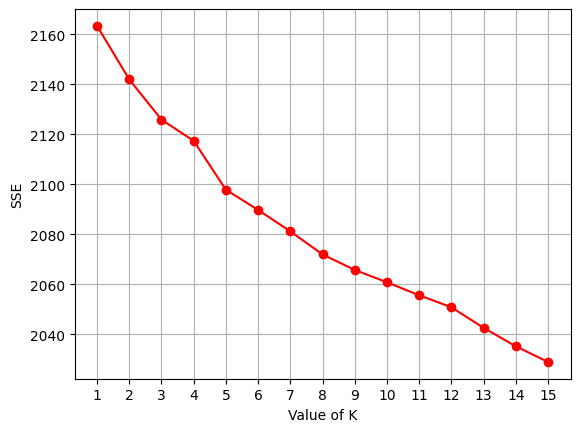

In [66]:
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker='o', color = 'r')

In [60]:
from kneed import KneeLocator

In [68]:
kl = KneeLocator(range(1,16), sse, curve='convex', direction='decreasing')

In [70]:
kl.elbow

5

In [71]:
km = KMeans(n_clusters=5, random_state=0, n_init='auto')

In [72]:
labels = km.fit_predict(x_new)

In [73]:
labels

array([4, 3, 4, ..., 3, 3, 3], dtype=int32)

In [74]:
km.labels_

array([4, 3, 4, ..., 3, 3, 3], dtype=int32)

#### Separate the clusters

In [76]:
len(labels)

2225

In [79]:
zero = cleaned_text[labels == 0]
one  = cleaned_text[labels == 1]
two  = cleaned_text[labels == 2]
three = cleaned_text[labels == 3]
four = cleaned_text[labels == 4]

In [80]:
zero.shape, one.shape, two.shape, three.shape, four.shape

((378,), (352,), (519,), (692,), (284,))

In [83]:
zero

72      [mp, issue, blackberry, threat, mp, thrown, co...
247     [game, warning, clearer, violent, video, game,...
300     [mp, issue, blackberry, threat, mp, thrown, co...
373     [uk, firm, uk, firm, embrace, internet, tradin...
928     [digital, uk, driven, net, tv, uk, adoption, d...
                              ...                        
1820    [news, corp, eye, video, game, market, news, c...
1861    [brussels, rap, mobile, call, charge, european...
2054    [make, office, work, mission, brighten, work, ...
2138    [orange, colour, clash, set, court, row, colou...
2149    [bt, offer, equal, access, rival, bt, move, po...
Name: 0, Length: 378, dtype: object

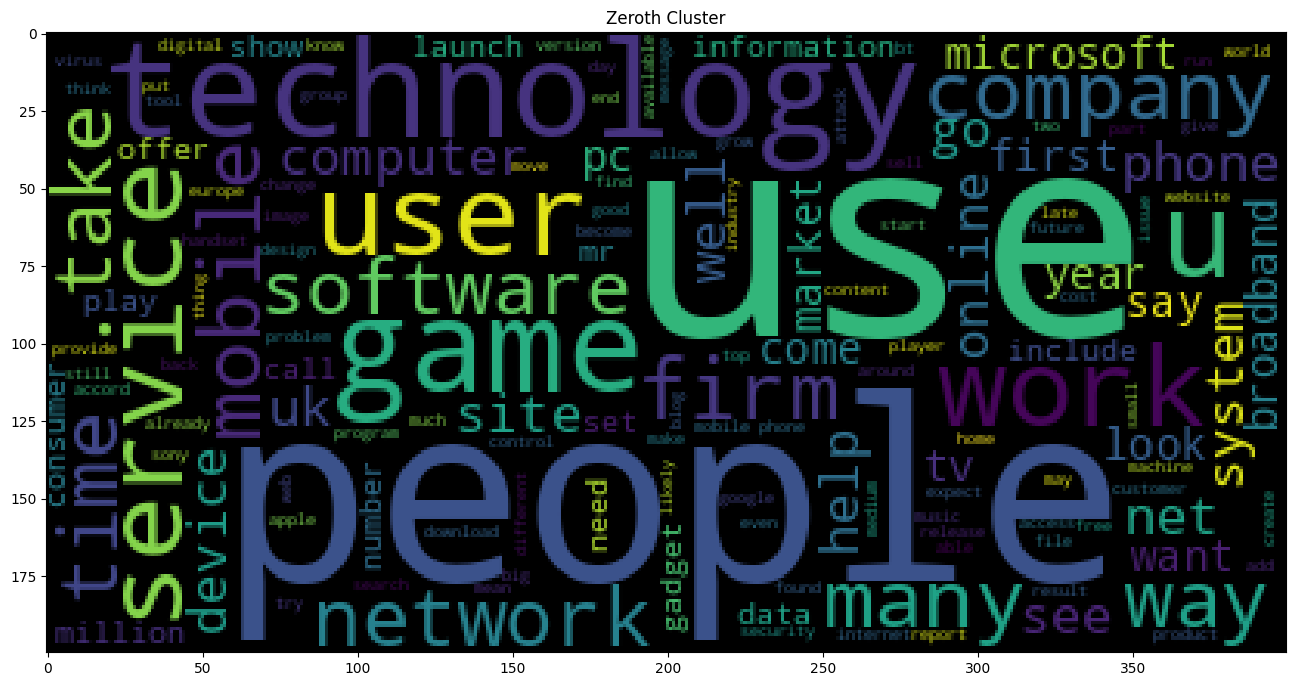

In [102]:
wc0 = WordCloud().generate(" ".join(zero.sum()))
plt.figure(figsize=(16,9))
plt.title('Zeroth Cluster')
plt.imshow(wc0)

In [103]:
from nltk import FreqDist

In [104]:
freq = FreqDist(zero.sum())

In [105]:
freq.most_common(10)

[('people', 952),
 ('use', 876),
 ('game', 807),
 ('technology', 602),
 ('mobile', 596),
 ('phone', 552),
 ('service', 525),
 ('also', 516),
 ('mr', 482),
 ('get', 468)]

In [106]:
freq = FreqDist(one.sum())
freq.most_common(10)

[('film', 1002),
 ('best', 605),
 ('award', 563),
 ('year', 558),
 ('star', 434),
 ('show', 431),
 ('music', 372),
 ('also', 367),
 ('u', 325),
 ('include', 317)]

In [107]:
freq = FreqDist(two.sum())
freq.most_common(10)

[('game', 709),
 ('win', 589),
 ('go', 532),
 ('player', 496),
 ('take', 478),
 ('get', 471),
 ('play', 469),
 ('england', 465),
 ('year', 454),
 ('first', 448)]

In [108]:
freq = FreqDist(three.sum())
freq.most_common(10)

[('year', 1114),
 ('u', 952),
 ('mr', 848),
 ('would', 762),
 ('company', 681),
 ('also', 597),
 ('firm', 579),
 ('government', 574),
 ('market', 534),
 ('last', 462)]

In [109]:
freq = FreqDist(four.sum())
freq.most_common(10)

[('mr', 1512),
 ('would', 817),
 ('labour', 732),
 ('party', 675),
 ('election', 626),
 ('blair', 545),
 ('government', 530),
 ('tory', 485),
 ('people', 452),
 ('minister', 420)]

In [110]:
result = {
    0:'technology',
    1:'movies',
    2:'sports',
    3:'finance',
    4:'politics'
}

In [135]:
new = '''player game win
'''

In [136]:
new = tfidf.transform([new])

In [138]:
result[km.predict(new)[0]]

'sports'

In [139]:
result

{0: 'technology', 1: 'movies', 2: 'sports', 3: 'finance', 4: 'politics'}